# 🚀 Deploying a Datasite with PySyft 0.9.1b

Thank you for being a PySyft beta tester! 🙌 Please read the scenario below and complete the mission to the best of your abilities. If this is an unmoderated test and you encounter issues that block all progress please message your moderator for additional assistance.

---

## 🖼 Scenario

You are currently working for the U.S. Census Bureau. You've just finished collecting and cleaning data gathered from the Bureau's 2024 American survey. You want to open it up for public research use by launching a public-facing Datasite (referred to as a lowside Datasite). 

## 😎 Mission

Your mission for this exercise is to use [Syft’s Deployment Documentation](https://docs.openmined.org/en/latest/deployment/deployment-doc-4-0-container-based-deployment.html) to launch a lowside Datasite using a single-container deployment. The Datasite will need:

- To be launched using a local machine or VM
- Will need to be named
- Will need you to login to confirm deployment

Please use this notebook to make notes and comments about your approach and any issues as you go. After you have successfully deployed your Datasite or if you have found that you are unable to deploy a Datasite please answer the “**Post-Test**” section at the bottom of this notebook and then notify your moderator.

### Helpful Resources
- [PySyft Documentation](https://docs.openmined.org/en/latest/index.html)
- [PySyft Repo](https://github.com/OpenMined/PySyft)


---


## 😎 Mission Response

In the cells below please take notes on your approach to the above **Scenario** along with any comments you'd like to make about your experience.

If you did not fill out the sign-up form then please include answers to the following in your notes:
- What OS are you using?
- How experienced are you with Python?
- How experienced are you with containers?

## First approach: Local NixOS with Podman

### Commands run

- Server with `./setup.sh -v 0.8.7-beta.13 -n local-podman -s low -t datasite -p 10000 --root-email info@openmined.org --root-password changethis`
- Client with `podman run --rm -it --network=host docker.io/openmined/syft-client:0.8.7-beta.13`

### General comments

#### Bash shebang
```
./setup.sh -v 0.9.1b -n local-podman -s low -t datasite -email info@openmined.org -password changethis
bash: ./setup.sh: cannot execute: required file not found
```

The problem is with the first line of the script `#!/bin/bash`. The POSIX portable way of setting the shebang is by using the `#!/usr/bin/env bash`, similar situation to using default python interpreter (it will use the first bash found in the `PATH`).

#### Setup variables
```
> bash setup.sh -v 0.9.1b -n local-podman -s low -t datasite
VERSION: 0.9.1b
SERVER_NAME: local-podman
SERVER_SIDE_TYPE: low
SERVER_TYPE: datasite
PORT: 
DEFAULT_ROOT_EMAIL: 
DEFAULT_ROOT_PASSWORD: 
All options are required.
Usage: setup.sh -v|--version <version> -n|--name <server_name> -t|--type <server_type> -p|--port <port> [-s|--side <server_side_type>] [--root-email <default_root_email>] [--root-password <default_root_password>]
```

However the documentation says: 

> To deploy your server, a range of arguments are available to setup the type of server you would like to launch and its profile:
> + --version or -v: version of PySyft you’d like to setup
> + --name or -n: an arbitrary name you’d like to give the server
> + --side or -s: high or low (Default is high if not specified)
> + --root-password or -password: The password you’d like to set for the root user (Default is changethis if not specified)
> + --root-email or -email: The email you’d like to set for the root user (Default is info@openmined.org if not specified)
> + --type or -t: datasite or gateway
> + --port or -p: The intended port to be assigned


So the text for the password and email should be changed to avoid saying that there are default values.

#### Non-existent shorthands

The website says that the shorthands `-email` and `-password` exist, but they don't work. It's probably best to move this piece of doc into a docstring in the bash script and extract it to generate the docs.

#### No 0.9.1b container image

`./setup.sh -v 0.9.1b -n local-podman -s low -t datasite -p 10000 --root-email info@openmined.org --root-password changethis` returns `Error: initializing source docker://openmined/grid-backend:0.9.1-beta.1: reading manifest 0.9.1-beta.1 in docker.io/openmined/grid-backend: manifest unknown
`. Indeed, on 30th of August, 2024; the last image pushed is [0.8.7-beta.13](https://hub.docker.com/layers/openmined/grid-backend/0.8.7-beta.13/images/sha256-bea1e5f82919ff0537f127ecab995aeb983f78970838ea316be94071c679b3ea?context=explore)

#### Variables ignored (version 0.8.7b13)

- Side is high instead of low
- No hostname
- Type is `domain` instead of `datasite`

The CLI shows the passed variables just right:
```
VERSION: 0.8.7-beta.13
SERVER_NAME: local-podman
SERVER_SIDE_TYPE: low
SERVER_TYPE: datasite
PORT: 10000
DEFAULT_ROOT_EMAIL: info@openmined.org
DEFAULT_ROOT_PASSWORD: changethis
```

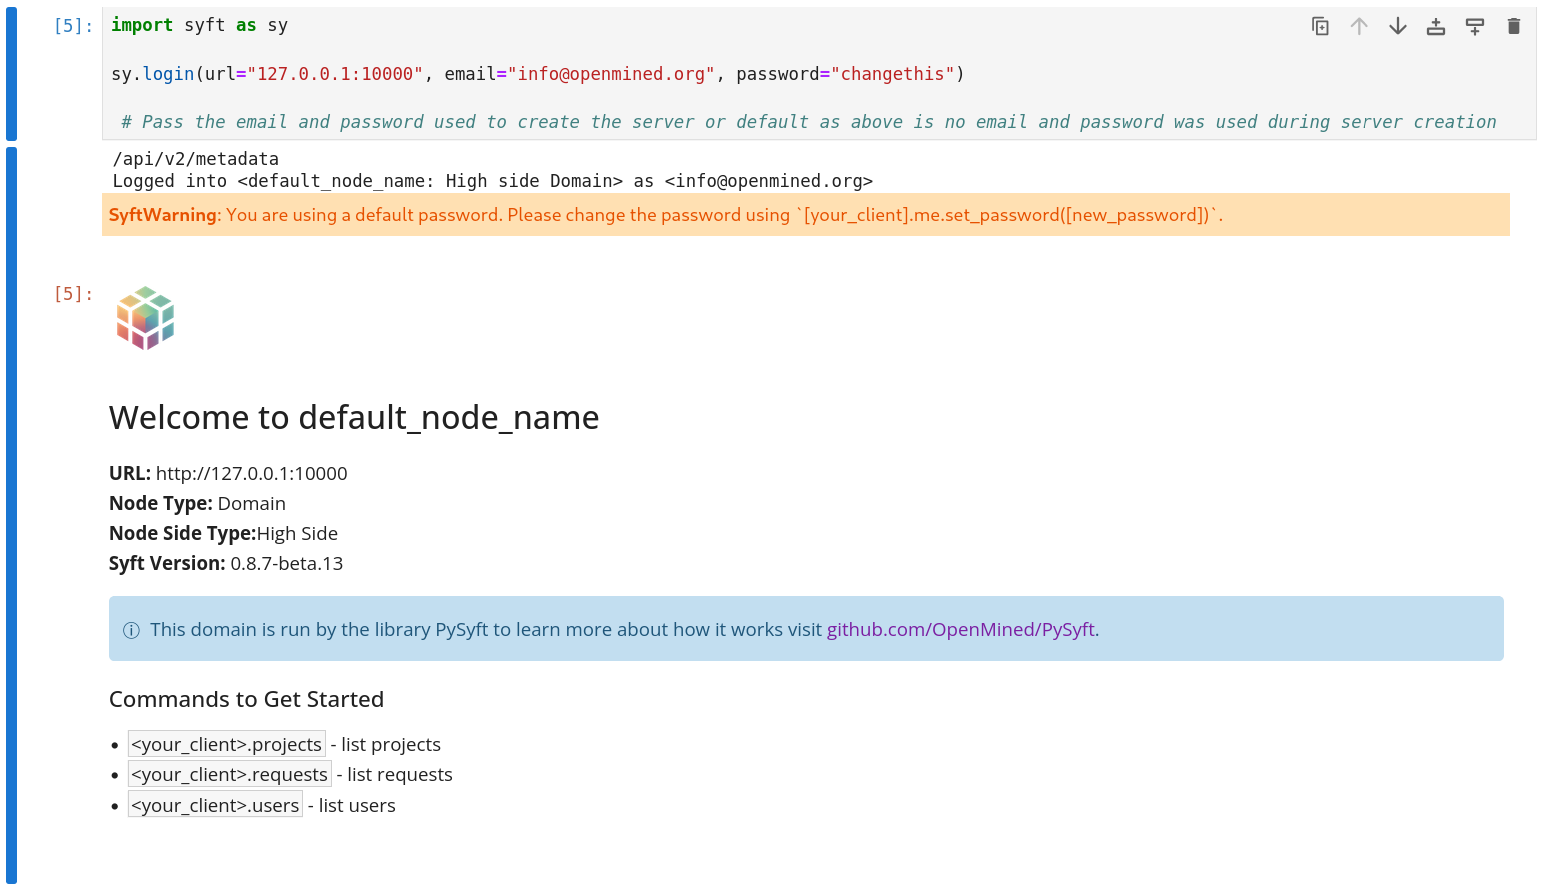



---


## ✏ Post-Test Response

### 1. Post-Test Survey
Please **upload your Mission Response notebook** [**→→ form here ←←**](https://forms.gle/t2bQjvtjPxyPfhGM9) to conclude the test.


---

## Thank You! 🙏
On behalf of the User Research Team here at OpenMined, thank you for your insight, your time, and your contributions. 

<img src="https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExOG85MXRzenkycWN2Mnp2cWl3ODBzMTVscnhmb2U2bGRrNnQ4YzY3eCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/IL4iTvQH0MjS/giphy.gif" width="400" height="400">